Sep. 26, 2019

**Write your names in the cell below**

Souei_chakir_sayadi

**Write names of the 4 variables assigned to your group** (based on file variable_assignments.txt)

smokday2,chccopd1,menthlth,height3

****

## Overview of the Data

The BRFSS (Behavioral Risk Factor Surveillance System) data was collected during the period 2013-2014 via monthly telephone-based surveys of randomly selected persons in the US. The rows in this data represent unique persons and the columns represent various demographic, life style, behavioral and health-related information about the interviewed persons.  Data website: https://www.cdc.gov/brfss/annual_data/annual_2013.html

All variables in this dataset are coded (represented) with numeric values, but many of them are truly categorical.

****

<font color='red'> **Files you will need ** </font> 

- File `brfss2013_sub.csv` : contains the data.
- File `data_codebook.html` : contains information about the data variables.
- File `variable_assignments_ISID.txt` : contains names of variables assigned to each group.
- File `TP2_Data_Cleaning.ipynb` : contains source code.

<font color='red'> **What you will do** </font> 

- Follow the instructions below and answer the questions.

- Your answers will generally consist of a mix of code and explanations.

- Feel free to create new cells to write your answers.

- Submit your modified .ipynb file containing your answers to the questions below.

******

## Useful functions and methods


**Data exploration**

- head, shape, columns, describe, value_counts, unique, nunique, plot

**Data type conversions**

- `pd.to_numeric` (Pandas function)
- `astype` (Pandas method)

**Dealing with missing values**
- `isna` (Pandas method)
- `fillna` (Pandas method)
- `dropna` (Pandas method)

*****

- to execute a cell, <font color='red'>shift+enter</font>
- to insert a new cell, press the <font color='red'>**+** button</font> in the top menu
- to obtain <font color='red'>help</font> about any method or function use ?

?pd.read_csv

?df.idate.isnull

## Part 1: Read the Data

Answer the following questions.  You need to write python code for some questions.

1. Read the data in file `brfss2013_sub.csv` and store it in a data frame called `df`
2. How many rows and columns are in this data frame?
3. What are the names and true types of the first 5 columns?
4. Are any of these first 5 columns useful for data mining? Explain.

In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

In [5]:
dir_path =r''
def get_files(dir_path, filename):
    return pd.read_csv(os.path.join(dir_path, filename), sep=';', header=None,engine='python')



In [4]:
#1
brfss= get_files(dir_path=dir_path, filename='brfss2013_SUB.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Lenovo\\Documents\\EGDownloads\\TP2_ILSI/brfss2013_SUB.csv'

In [6]:
df=pd.read_csv('brfss2013_SUB.csv')

In [5]:
brfss.columns=['idate','imonth','iday','iyear','dispcode','seqno','ladult','numadult','nummen','numwomen','genhlth','physhlth','menthlth','poorhlth','hlthpln1','persdoc2','medcost','checkup1','sleptim1','bphigh4','bpmeds','bloodcho','cholchk','toldhi2','cvdinfr4','cvdcrhd4','cvdstrk3','asthma3','asthnow','chcscncr','chcocncr','chccopd1','havarth3','addepev2','chckidny','diabete3','veteran3','marital','children','educa','employ1','income2','weight2','height3','renthom1','sex','pregnant','qlactlm2','useequip','blind','decide','diffwalk','diffdres','diffalon','smoke100','smokday2','stopsmk2','lastsmk2','usenow3','alcday5','avedrnk2','drnk3ge5','maxdrnks','fruitju1','fruit1','fvbeans','fvgreen','fvorang','vegetab1','exerany2','exract11','exeroft1','exerhmm1','exract21','exeroft2','exerhmm2','strength','lmtjoin3','arthdis2','arthsocl','joinpain','seatbelt','flushot6','flshtmy2','tetanus','pneuvac3','hivtst6','hivtstd3','whrtst10','x.imprace','x.age.g']

In [10]:
brfss_grp=brfss[['idate','imonth','iday','iyear','dispcode']]

In [7]:
brfss=df

In [8]:
#2
brfss.shape

(100000, 91)

In [11]:
brfss_grp.dtypes

idate       int64
imonth      int64
iday        int64
iyear       int64
dispcode    int64
dtype: object

**Categorical variables:**
-smokday2
-chccopd1
**Discrete numeric variables:**
-menthlth


**Continuous numeric variables:**
-height3

**Categorical variables:**
-dispcode
-iyear 
-imonth
-idate
-iday

imonth,iday,iyear sont representées dans la variable idate donc ils sont inutiles

******

## Part 2: Data Exploration and Cleaning

Answer the questions below.

1. Create a list called `my_vars_names` containing the names of the 4 variables that were assigned to your group.

2. Create a new data frame called `my_df` as a subset of `df` containing only the columns in `my_vars_names`.

3. Verify the shape of this new data frame; Make sure its number of rows is the same as in `df`.

4. Determine the **true** type of each variable based on its description in file `data_codebook.html`; is it *categorical*, *discrete*, *continuous*, or **other** ?

5. For each truly *categorical* variable, convert it to the *category* type by calling the `astype` method ...

6. For each numeric variable, determine the unit(s) of measurement of its values based on the description in file `data_codebook.html`. For example: number of times per week; kilograms, etc.  **Be careful**: some variables contain values with different measurement units. For example, the **weight2** variable contains both values in *pounds* and values in *kilograms*! ...

7. For each numeric variable, determine whether it contains any invalid values; that is, values that are inconsistent with the variable's description in file `data_codebook.html`. **Hint**: the `describe` and `unique` methods are helpful ...

8. For each numeric variable, determine whether it contains outliers. **Hint1**: start by visualizing the distribution of the variable using a boxplot or histogram.  **Hint2**: if your variable has multiple units of measurement, use different plots for different units ...

9. For each categorical variable, how many categories does it have? **Hint**: call the `nunique` and/or `value_counts` methods ...

10. For each variable, if it contains **implicitly** encoded missing values, then replace those values with the explicit NAN value `np.nan`

11. How many missing values does each variable contain? **Hint**: call the `isnull` method followed by the `sum` method ...

12. Which variables should be removed because they contain too many missing values (more than 30%)?  **Hint**: call `isnull` followed by `mean` in order to obtain the fraction of missing values for each variable.

13. Remove all variables from `my_df` that contain more than 30% missing values. Put the result in a new data frame called `my_df_without_noisy_variables`. Display the shape of this data frame.

14. Remove all rows from `my_df` that contain missing values by calling the `dropna` method. Put the result in a new data frame called `my_df_without_missing`.  Display the shape of this new data frame.  **Hint**: carefully read the documentation of the `dropna` method using the command `?my_df.dropna`.

15. Based on the result of the previous question, do you think it's a good idea to handle missing values by removing the entire row? Explain.

16. For each numeric variable that has less than 30% missing values, replace its missing values with its *median* value, and put the result in the SAME data frame `my_df`. You should call the `fillna` method SEPARATELY on each variable, with the parameter `inplace=True`.

17. For each categorical variable that has less than 30% missing values, replace its missing values with the *most frequent* value and put the result in the SAME data frame `my_df`, by calling the `fillna` method SEPARATELY on each variable, with `inplace=True`.

In [12]:
#1
my_vars_names=['smokday2','chccopd1','menthlth','height3']


In [13]:
#2
my_df=brfss[my_vars_names]

In [14]:
#3
print(my_df.shape)
my_df.shape[0]==brfss.shape[0]

(100000, 4)


True

#4

**Categorical variables:**
-smokday2
-chccopd1

**Discrete numeric variables:**
-menthlth


**Continuous numeric variables:**
-height3

In [15]:
my_df.dtypes

smokday2    float64
chccopd1    float64
menthlth    float64
height3     float64
dtype: object

In [16]:
my_df['smokday2']=my_df['smokday2'].astype('category')
my_df['chccopd1']=my_df['chccopd1'].astype('category')


/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [17]:
my_df.dtypes

smokday2    category
chccopd1    category
menthlth     float64
height3      float64
dtype: object

In [18]:
my_df['height3'].describe()

count    99731.000000
mean       655.939628
std       1074.553415
min        210.000000
25%        504.000000
50%        506.000000
75%        510.000000
max       9999.000000
Name: height3, dtype: float64

In [19]:
def convert_height(x):
    if x==7777 or x==9999 or pd.isna(x):
        return np.nan
    elif x <= 711  and x>=200 :
        x = int(x)
        return 2.54*((x/100)*12+x%100)
    elif x <= 9998  and x>=9000 :
        x = x-9000
        return (x/100)*100+(x%100)
    else:
        #print(x)
        return -1

In [20]:
convert_height(9998)

1096.0

In [21]:
my_df.height3.dtype

dtype('float64')

In [22]:
my_df['height']=my_df.height3.map(convert_height)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [23]:
my_df.height.describe()

count    98443.000000
mean       171.062896
std         11.461854
min         -1.000000
25%        163.779200
50%        169.468800
75%        180.848000
max        518.000000
Name: height, dtype: float64

#6

Height (ft / in)

Height  (meters / centimeters)


In [24]:
#7
my_df['height'].describe()

# the unusual variable is -1

count    98443.000000
mean       171.062896
std         11.461854
min         -1.000000
25%        163.779200
50%        169.468800
75%        180.848000
max        518.000000
Name: height, dtype: float64

In [25]:
my_df['menthlth'].describe()

count    99999.000000
mean        64.728617
std         35.771404
min          1.000000
25%         30.000000
50%         88.000000
75%         88.000000
max         99.000000
Name: menthlth, dtype: float64

In [26]:
my_df['menthlth'].unique()
# 77 and 99 are missing values and nan is unusual value

array([ 1., 88., 15.,  2., 99., 21., 30., 10., 25., 20., 77.,  3.,  5.,
        7.,  4., 12.,  8.,  6., 18., 17., 16., 14., 29., 27., 22., 13.,
       24.,  9., 26., 28., 11., 19., 23., nan])

In [35]:
my_df.menthlth.value_counts()

88.0    68151
30.0     5102
2.0      4781
5.0      3373
1.0      3038
3.0      2764
10.0     2433
15.0     2222
20.0     1384
4.0      1305
77.0     1295
7.0      1286
14.0      538
99.0      471
25.0      450
6.0       374
8.0       259
12.0      162
28.0      139
21.0       93
29.0       91
18.0       42
9.0        40
27.0       32
22.0       31
16.0       31
17.0       24
24.0       21
13.0       21
26.0       17
11.0       14
23.0        9
19.0        6
Name: menthlth, dtype: int64

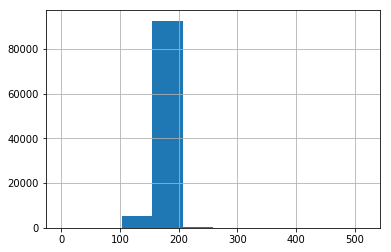

In [24]:
my_df['height'].hist()

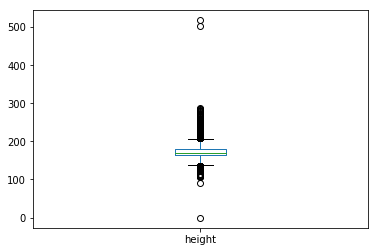

In [36]:
#8
my_df.loc[:,'height'].plot.box()
#yes it contains outliers

In [40]:
my_df.height

0        155.2448
1        188.5696
2        160.9344
3        152.4000
4        160.9344
5        172.3136
6        163.7792
7        163.7792
8        172.3136
9        155.2448
10       169.4688
11       169.4688
12       158.0896
13       152.4000
14       172.3136
15       172.3136
16       180.8480
17       175.1584
18       169.4688
19       163.7792
20       172.3136
21       160.9344
22       172.3136
23       169.4688
24       169.4688
25       158.0896
26       172.3136
27       178.0032
28       182.8800
29       166.6240
           ...   
99970    166.6240
99971    183.6928
99972    197.1040
99973    158.0896
99974         NaN
99975    169.4688
99976    178.0032
99977    158.0896
99978    158.0896
99979    185.7248
99980    178.0032
99981    175.1584
99982    155.2448
99983    169.4688
99984    155.2448
99985    158.0896
99986    163.7792
99987    169.4688
99988    178.0032
99989    158.0896
99990    152.4000
99991    180.8480
99992    175.1584
99993    182.8800
99994    1

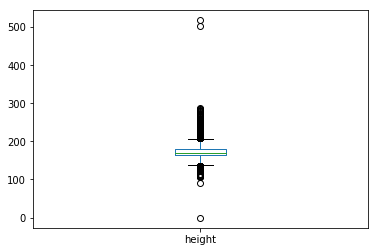

In [37]:
my_df.height.plot.box()

In [41]:
#9
my_df['smokday2'].value_counts()

3.0    28085
1.0    11163
2.0     4310
9.0       56
7.0       20
Name: smokday2, dtype: int64

In [42]:
my_df['chccopd1'].value_counts()

2.0    91181
1.0     8278
7.0      506
9.0       35
Name: chccopd1, dtype: int64

In [43]:
#explicit 
my_df.smokday2.isnull().sum()

56366

In [46]:
my_df[(my_df['smokday2']==7)|(my_df['smokday2']==9)]

,smokday2,chccopd1,menthlth,height3,height


In [45]:
#10
my_df[(my_df['smokday2']==7)|(my_df['smokday2']==9)]=np.nan

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/ubuntu/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [47]:
#10 et 11
my_df['smokday2'].isnull().sum()

56442

In [48]:
my_df.chccopd1.isnull().sum()

76

In [49]:
my_df.chccopd1.describe()

count     99924.0
unique        4.0
top           2.0
freq      91118.0
Name: chccopd1, dtype: float64

In [51]:
my_df[(my_df['chccopd1']==7)|(my_df['chccopd1']==9)]=np.nan

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [52]:
my_df.chccopd1.isnull().sum()

615

In [53]:
my_df[(my_df['menthlth']==77)|(my_df['menthlth']==99)]=np.nan

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [54]:
my_df.menthlth.isnull().sum()

2339

In [55]:
my_df[my_df['height']==-1]=np.nan

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [56]:
my_df.height.isnull().sum()

3789

In [58]:
#12
my_df.height.isnull().mean()

0.03789

In [40]:
my_df.menthlth.isnull().mean()

0.0234

In [41]:
my_df.smokday2.isnull().mean()

0.57503

In [42]:
my_df.chccopd1.isnull().mean()

0.02339

variable that we should remove is  smokday2 because more than 30% are null

In [59]:
#13
my_df_without_noisy_variables=my_df.drop(columns=['smokday2','height3'])

In [60]:
my_df_without_noisy_variables.head(5)

,chccopd1,menthlth,height
0,2.0,1.0,155.2448
1,2.0,88.0,188.5696
2,2.0,88.0,160.9344
3,2.0,88.0,152.4000
4,2.0,15.0,160.9344


In [61]:
my_df_without_noisy_variables.shape

(100000, 3)

In [63]:
#14
my_df_without_missing=my_df.copy()
my_df_without_missing=my_df_without_missing.dropna()
my_df_without_missing.isna().sum()

smokday2    0
chccopd1    0
menthlth    0
height3     0
height      0
dtype: int64

#15
yes it's  a good idea because we still have enough data to handle 

In [64]:
#16
my_df['menthlth'].fillna(my_df['menthlth'].median(),inplace=True)
my_df['height'].fillna(my_df['height'].median(),inplace=True)
my_df.isna().sum()

/home/ubuntu/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


smokday2    57503
chccopd1     2339
menthlth        0
height3      2597
height          0
dtype: int64

In [65]:
my_df.dtypes

smokday2    category
chccopd1    category
menthlth     float64
height3      float64
height       float64
dtype: object

In [66]:
my_df.smokday2.value_counts()

3.0    27427
1.0    10876
2.0     4194
9.0        0
7.0        0
Name: smokday2, dtype: int64

In [67]:
#17
my_df['smokday2'].fillna(value=3.0,inplace=True)

In [68]:
my_df.chccopd1.value_counts()

2.0    89625
1.0     8036
9.0        0
7.0        0
Name: chccopd1, dtype: int64

In [69]:
my_df['chccopd1'].fillna(value=2.0,inplace=True)

In [53]:
my_df=my_df.drop(columns=['height3'])

In [54]:
my_df.isnull().sum()


smokday2    0
chccopd1    0
menthlth    0
height      0
dtype: int64

*****